# Notebook Para Análise de Seguro Rural

## Step 01 - Importando as bibliotecas e o DataFrame

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import warnings


# Configuração para mostrar todas as colunas (opcional, mas útil para análise)
pd.set_option('display.max_columns', None)

# Ignorar avisos para uma saída mais limpa
warnings.filterwarnings("ignore")

# Estilo dos gráficos
plt.style.use("seaborn-v0_8-whitegrid")

In [14]:
# 1. A URL
url = "https://dados.agricultura.gov.br/dataset/baefdc68-9bad-4204-83e8-f2888b79ab48/resource/97f29a77-4e7e-44bf-99b3-a2d75911b6bf/download/dados_abertos_psr_2006a2015csv.csv"

# 2. A Camuflagem (Cabeçalho de Navegador Real)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

print("Iniciando download camuflado...")

try:
    # Faz a requisição fingindo ser um navegador
    # verify=False é necessário pois sites do governo as vezes tem certificados SSL desatualizados
    response = requests.get(url, headers=headers, verify=False)

    # Verifica se deu certo (Código 200 = OK)
    if response.status_code == 200:
        print("Download concluído! Lendo o CSV...")

        # Transforma o conteúdo baixado em um arquivo virtual na memória
        arquivo_virtual = io.BytesIO(response.content)

        # Lê com o Pandas (mantendo as configurações brasileiras)
        df = pd.read_csv(arquivo_virtual, sep=';', encoding='latin1', low_memory=False)

        print("Sucesso! Dados carregados.")
        print(f"Linhas e Colunas: {df.shape}")
        display(df.head())
    else:
        print(f"Falha no download. Código do servidor: {response.status_code}")

except Exception as e:
    print(f"Erro crítico: {e}")

Iniciando download camuflado...
Download concluído! Lendo o CSV...
Sucesso! Dados carregados.
Linhas e Colunas: (617683, 38)


,NM_RAZAO_SOCIAL,CD_PROCESSO_SUSEP,NR_PROPOSTA,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,DT_FIM_VIGENCIA,NM_SEGURADO,NR_DOCUMENTO_SEGURADO,NM_MUNICIPIO_PROPRIEDADE,SG_UF_PROPRIEDADE,LATITUDE,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,LONGITUDE,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_DECIMAL_LATITUDE,NR_DECIMAL_LONGITUDE,NM_CLASSIF_PRODUTO,NM_CULTURA_GLOBAL,NR_AREA_TOTAL,NR_ANIMAL,NR_PRODUTIVIDADE_ESTIMADA,NR_PRODUTIVIDADE_SEGURADA,NivelDeCobertura,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,NR_APOLICE,DT_APOLICE,ANO_APOLICE,CD_GEOCMU,VALOR_INDENIZAÇÃO,EVENTO_PREPONDERANTE
0,Allianz Seguros S.A,15414003124200656,1868060,597140,11/04/2007,23/07/2016,23/07/2016,MARCOS JOSE DE SOUZA,***28590878,Piracaia,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,118,-,0,0,-,590000,6667,"0,0113","2000,1",0000015,11/05/2007,2007,3538600,-,-
1,Allianz Seguros S.A,15414003124200656,1868079,597138,11/04/2007,23/07/2016,23/07/2016,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,85,-,0,0,-,425000,"4802,5","0,0113","1440,75",0000016,11/05/2007,2007,3520202,-,-
2,Allianz Seguros S.A,15414003124200656,1868139,597139,11/04/2007,23/07/2016,23/07/2016,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,70,-,0,0,-,350000,3955,"0,0113","1186,5",0000014,11/05/2007,2007,3520202,-,-
3,Allianz Seguros S.A,15414003124200656,1886479,596987,17/04/2007,23/07/2016,23/07/2016,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,11,-,0,0,-,78319,"767,53","0,009800049","230,26",0000019,18/05/2007,2007,5300108,-,-
4,Allianz Seguros S.A,15414003124200656,1886485,596988,17/04/2007,23/07/2016,23/07/2016,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,117,-,0,0,-,1867385,"13818,65","0,007400001","4145,6",0000020,18/05/2007,2007,5300108,-,-


## Step 02 - Exploração inicial do DataFrame

In [15]:
# Exploração inicial do conjunto de dados.

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617683 entries, 0 to 617682
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   NM_RAZAO_SOCIAL            617683 non-null  object
 1   CD_PROCESSO_SUSEP          617683 non-null  int64 
 2   NR_PROPOSTA                617683 non-null  object
 3   ID_PROPOSTA                617683 non-null  int64 
 4   DT_PROPOSTA                617683 non-null  object
 5   DT_INICIO_VIGENCIA         617683 non-null  object
 6   DT_FIM_VIGENCIA            617683 non-null  object
 7   NM_SEGURADO                617683 non-null  object
 8   NR_DOCUMENTO_SEGURADO      617683 non-null  object
 9   NM_MUNICIPIO_PROPRIEDADE   617683 non-null  object
 10  SG_UF_PROPRIEDADE          617683 non-null  object
 11  LATITUDE                   617683 non-null  object
 12  NR_GRAU_LAT                617602 non-null  object
 13  NR_MIN_LAT                 609728 non-null  

,NM_RAZAO_SOCIAL,CD_PROCESSO_SUSEP,NR_PROPOSTA,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,DT_FIM_VIGENCIA,NM_SEGURADO,NR_DOCUMENTO_SEGURADO,NM_MUNICIPIO_PROPRIEDADE,SG_UF_PROPRIEDADE,LATITUDE,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,LONGITUDE,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_DECIMAL_LATITUDE,NR_DECIMAL_LONGITUDE,NM_CLASSIF_PRODUTO,NM_CULTURA_GLOBAL,NR_AREA_TOTAL,NR_ANIMAL,NR_PRODUTIVIDADE_ESTIMADA,NR_PRODUTIVIDADE_SEGURADA,NivelDeCobertura,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,NR_APOLICE,DT_APOLICE,ANO_APOLICE,CD_GEOCMU,VALOR_INDENIZAÇÃO,EVENTO_PREPONDERANTE
0,Allianz Seguros S.A,15414003124200656,1868060,597140,11/04/2007,23/07/2016,23/07/2016,MARCOS JOSE DE SOUZA,***28590878,Piracaia,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,118,-,0,0,-,590000,6667,"0,0113","2000,1",0000015,11/05/2007,2007,3538600,-,-
1,Allianz Seguros S.A,15414003124200656,1868079,597138,11/04/2007,23/07/2016,23/07/2016,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,85,-,0,0,-,425000,"4802,5","0,0113","1440,75",0000016,11/05/2007,2007,3520202,-,-
2,Allianz Seguros S.A,15414003124200656,1868139,597139,11/04/2007,23/07/2016,23/07/2016,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,70,-,0,0,-,350000,3955,"0,0113","1186,5",0000014,11/05/2007,2007,3520202,-,-
3,Allianz Seguros S.A,15414003124200656,1886479,596987,17/04/2007,23/07/2016,23/07/2016,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,11,-,0,0,-,78319,"767,53","0,009800049","230,26",0000019,18/05/2007,2007,5300108,-,-
4,Allianz Seguros S.A,15414003124200656,1886485,596988,17/04/2007,23/07/2016,23/07/2016,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,117,-,0,0,-,1867385,"13818,65","0,007400001","4145,6",0000020,18/05/2007,2007,5300108,-,-


In [16]:
df.columns.tolist()

['NM_RAZAO_SOCIAL',
 'CD_PROCESSO_SUSEP',
 'NR_PROPOSTA',
 'ID_PROPOSTA',
 'DT_PROPOSTA',
 'DT_INICIO_VIGENCIA',
 'DT_FIM_VIGENCIA',
 'NM_SEGURADO',
 'NR_DOCUMENTO_SEGURADO',
 'NM_MUNICIPIO_PROPRIEDADE',
 'SG_UF_PROPRIEDADE',
 'LATITUDE',
 'NR_GRAU_LAT',
 'NR_MIN_LAT',
 'NR_SEG_LAT',
 'LONGITUDE',
 'NR_GRAU_LONG',
 'NR_MIN_LONG',
 'NR_SEG_LONG',
 'NR_DECIMAL_LATITUDE',
 'NR_DECIMAL_LONGITUDE',
 'NM_CLASSIF_PRODUTO',
 'NM_CULTURA_GLOBAL',
 'NR_AREA_TOTAL',
 'NR_ANIMAL',
 'NR_PRODUTIVIDADE_ESTIMADA',
 'NR_PRODUTIVIDADE_SEGURADA',
 'NivelDeCobertura',
 'VL_LIMITE_GARANTIA',
 'VL_PREMIO_LIQUIDO',
 'PE_TAXA',
 'VL_SUBVENCAO_FEDERAL',
 'NR_APOLICE',
 'DT_APOLICE',
 'ANO_APOLICE',
 'CD_GEOCMU',
 'VALOR_INDENIZAÇÃO',
 'EVENTO_PREPONDERANTE']

## Step 03 - Limpeza e Tratamento

In [17]:
# Altera o tipo de dados das colunas para datatime

cols = [
    'DT_PROPOSTA',
    'DT_INICIO_VIGENCIA',
    'DT_FIM_VIGENCIA'
]

# Converte para datetime, interpretando formato brasileiro
df[cols] = df[cols].apply(lambda x: pd.to_datetime(x, dayfirst=True))

# Extrai apenas a parte da data
df[cols] = df[cols].apply(lambda x: x.dt.date) # Converte para date, removendo o tempo.


# Verifica os tipos de dados após a alteração
df.head()

,NM_RAZAO_SOCIAL,CD_PROCESSO_SUSEP,NR_PROPOSTA,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,DT_FIM_VIGENCIA,NM_SEGURADO,NR_DOCUMENTO_SEGURADO,NM_MUNICIPIO_PROPRIEDADE,SG_UF_PROPRIEDADE,LATITUDE,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,LONGITUDE,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_DECIMAL_LATITUDE,NR_DECIMAL_LONGITUDE,NM_CLASSIF_PRODUTO,NM_CULTURA_GLOBAL,NR_AREA_TOTAL,NR_ANIMAL,NR_PRODUTIVIDADE_ESTIMADA,NR_PRODUTIVIDADE_SEGURADA,NivelDeCobertura,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,NR_APOLICE,DT_APOLICE,ANO_APOLICE,CD_GEOCMU,VALOR_INDENIZAÇÃO,EVENTO_PREPONDERANTE
0,Allianz Seguros S.A,15414003124200656,1868060,597140,2007-04-11,2016-07-23,2016-07-23,MARCOS JOSE DE SOUZA,***28590878,Piracaia,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,118,-,0,0,-,590000,6667,"0,0113","2000,1",0000015,11/05/2007,2007,3538600,-,-
1,Allianz Seguros S.A,15414003124200656,1868079,597138,2007-04-11,2016-07-23,2016-07-23,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,85,-,0,0,-,425000,"4802,5","0,0113","1440,75",0000016,11/05/2007,2007,3520202,-,-
2,Allianz Seguros S.A,15414003124200656,1868139,597139,2007-04-11,2016-07-23,2016-07-23,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,70,-,0,0,-,350000,3955,"0,0113","1186,5",0000014,11/05/2007,2007,3520202,-,-
3,Allianz Seguros S.A,15414003124200656,1886479,596987,2007-04-17,2016-07-23,2016-07-23,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,11,-,0,0,-,78319,"767,53","0,009800049","230,26",0000019,18/05/2007,2007,5300108,-,-
4,Allianz Seguros S.A,15414003124200656,1886485,596988,2007-04-17,2016-07-23,2016-07-23,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,117,-,0,0,-,1867385,"13818,65","0,007400001","4145,6",0000020,18/05/2007,2007,5300108,-,-


In [18]:
# transformando colunas categóricas em numéricas

cols =[

    'NR_AREA_TOTAL',
    'NR_ANIMAL',
    'NR_PRODUTIVIDADE_ESTIMADA',
    'NR_PRODUTIVIDADE_SEGURADA',
    'NivelDeCobertura',
    'VL_LIMITE_GARANTIA',
    'VL_PREMIO_LIQUIDO',
    'PE_TAXA',
    'VL_SUBVENCAO_FEDERAL',
    'VALOR_INDENIZAÇÃO'

    ]

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce').round(2)

df


,NM_RAZAO_SOCIAL,CD_PROCESSO_SUSEP,NR_PROPOSTA,ID_PROPOSTA,DT_PROPOSTA,DT_INICIO_VIGENCIA,DT_FIM_VIGENCIA,NM_SEGURADO,NR_DOCUMENTO_SEGURADO,NM_MUNICIPIO_PROPRIEDADE,SG_UF_PROPRIEDADE,LATITUDE,NR_GRAU_LAT,NR_MIN_LAT,NR_SEG_LAT,LONGITUDE,NR_GRAU_LONG,NR_MIN_LONG,NR_SEG_LONG,NR_DECIMAL_LATITUDE,NR_DECIMAL_LONGITUDE,NM_CLASSIF_PRODUTO,NM_CULTURA_GLOBAL,NR_AREA_TOTAL,NR_ANIMAL,NR_PRODUTIVIDADE_ESTIMADA,NR_PRODUTIVIDADE_SEGURADA,NivelDeCobertura,VL_LIMITE_GARANTIA,VL_PREMIO_LIQUIDO,PE_TAXA,VL_SUBVENCAO_FEDERAL,NR_APOLICE,DT_APOLICE,ANO_APOLICE,CD_GEOCMU,VALOR_INDENIZAÇÃO,EVENTO_PREPONDERANTE
0,Allianz Seguros S.A,15414003124200656,1868060,597140,2007-04-11,2016-07-23,2016-07-23,MARCOS JOSE DE SOUZA,***28590878,Piracaia,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,118,NaN,0.0,0.0,NaN,590000.0,6667.0,NaN,NaN,0000015,11/05/2007,2007,3538600,NaN,-
1,Allianz Seguros S.A,15414003124200656,1868079,597138,2007-04-11,2016-07-23,2016-07-23,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,85,NaN,0.0,0.0,NaN,425000.0,NaN,NaN,NaN,0000016,11/05/2007,2007,3520202,NaN,-
2,Allianz Seguros S.A,15414003124200656,1868139,597139,2007-04-11,2016-07-23,2016-07-23,MARCOS JOSE DE SOUZA,***28590878,Igaratá,SP,-,-,-,-,-,-,-,-,-,-,-,Floresta,70,NaN,0.0,0.0,NaN,350000.0,3955.0,NaN,NaN,0000014,11/05/2007,2007,3520202,NaN,-
3,Allianz Seguros S.A,15414003124200656,1886479,596987,2007-04-17,2016-07-23,2016-07-23,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,11,NaN,0.0,0.0,NaN,78319.0,NaN,NaN,NaN,0000019,18/05/2007,2007,5300108,NaN,-
4,Allianz Seguros S.A,15414003124200656,1886485,596988,2007-04-17,2016-07-23,2016-07-23,PASSARELLI AGROPECUÁRIA LTDA,***45552000100,Brasília,DF,-,-,-,-,-,-,-,-,-,-,-,Floresta,117,NaN,0.0,0.0,NaN,1867385.0,NaN,NaN,NaN,0000020,18/05/2007,2007,5300108,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617678,Swiss Re Corporate Solutions Brasil S.A.,15414000042200650,02071000301,293218,2014-07-04,2016-07-22,2016-07-22,A.W.FABER CASTELL S/A,***96908000152,Prata,MG,S,30,20,19,W,48,40,NaN,-,-,-,Floresta,6455,NaN,0.0,0.0,NaN,176776864.0,NaN,NaN,32000.0,02070000086,19/08/2014,2014,3152808,NaN,-
617679,Swiss Re Corporate Solutions Brasil S.A.,1541400042200650,02071000302,294577,2014-07-04,2016-07-22,2016-07-22,FABER CASTELL PROJETOS IMOBILIÁRIOS,***01863000122,Brasília,DF,S,21,NaN,NaN,W,51,18,52,-,-,-,Floresta,63,NaN,0.0,0.0,NaN,15552856.0,18720.0,NaN,7488.0,02070000085,15/08/2014,2014,5300108,NaN,-
617680,Swiss Re Corporate Solutions Brasil S.A.,15414000042200650,02071000310,286763,2014-09-04,2016-07-22,2016-07-22,ROSANA LEONARDI GALHARDO DUMAS DAMAS,***25985826,Bofete,SP,S,23,14,18,W,40,20,48,-,-,-,Floresta,15,NaN,0.0,0.0,NaN,500000.0,NaN,NaN,NaN,02070000088,09/10/2014,2014,3506904,NaN,-
617681,Swiss Re Corporate Solutions Brasil S.A.,15414000042200650,02071000313,287219,2014-10-31,2016-07-22,2016-07-22,CMPC CELULOSE RIOGRANDENSE LTDA,***34954000185,Guaíba,RS,S,30,6,49,W,51,19,40,-,-,-,Floresta,159499,NaN,0.0,0.0,NaN,17920000.0,NaN,NaN,32000.0,02070000092,29/11/2014,2014,4309308,16449140.0,INCÊNDIO


## Step 04 - Visualização dos Dados (Gráficos)

### Análise da Evolução do Seguro Rural no Brasil (2006–2015) 

> Contexto de Crescimento (2006–2014)
- O período foi marcado por **expansão do agronegócio brasileiro**, com aumento da produção e exportação de grãos.
- O governo federal ampliou o **Programa de Subvenção ao Prêmio do Seguro Rural (PSR)**, criado em 2003, que subsidiava parte do custo das apólices.
- Esse incentivo reduziu o preço do seguro e estimulou a contratação, resultando em crescimento contínuo até o pico de **2014 (117.597 apólices)**.
- A estabilidade econômica e a valorização das commodities agrícolas reforçaram a demanda por proteção contra riscos climáticos.

> Ruptura em 2015
- O Brasil entrou em **recessão econômica** em 2015, com queda do PIB e alta da inflação.
- Houve **cortes orçamentários no PSR**, reduzindo drasticamente os recursos destinados ao subsídio das apólices.
- A ausência de apoio governamental encareceu o seguro rural, levando muitos produtores a desistirem da contratação.
- Resultado: uma queda abrupta de **66%** no número de apólices emitidas em relação a 2014.

> 🎯 Conclusão
O gráfico evidencia a **dependência estrutural do seguro rural brasileiro em relação ao subsídio público**.  
- O crescimento até 2014 mostra o efeito positivo das políticas de incentivo.  
- A queda em 2015 revela a vulnerabilidade do setor diante da retirada de apoio governamental e da crise econômica.  

Essa análise reforça que, nesse período, o seguro rural ainda não havia se consolidado como prática autossustentável, dependendo fortemente da política pública para manter sua expansão.

---

> 📚 Fontes
- [Seguro Agrícola no Brasil – Uma visão estratégica (MB Agro, MAPA)](https://www.gov.br/agricultura/pt-br/assuntos/riscos-seguro/seguro-rural/observatorio-do-seguro-rural/estudos/estudos-2012-1/seguro-agricola-no-brasil-uma-visao-estrategica-mb-agro.pdf)  
- [Análise dos programas federais de seguro rural no Brasil de 2000 a 2022 – SciELO](https://www.scielo.br/j/resr/a/CfGfMm3Hm3fhSGSLn8XP7hq/?format=pdf)

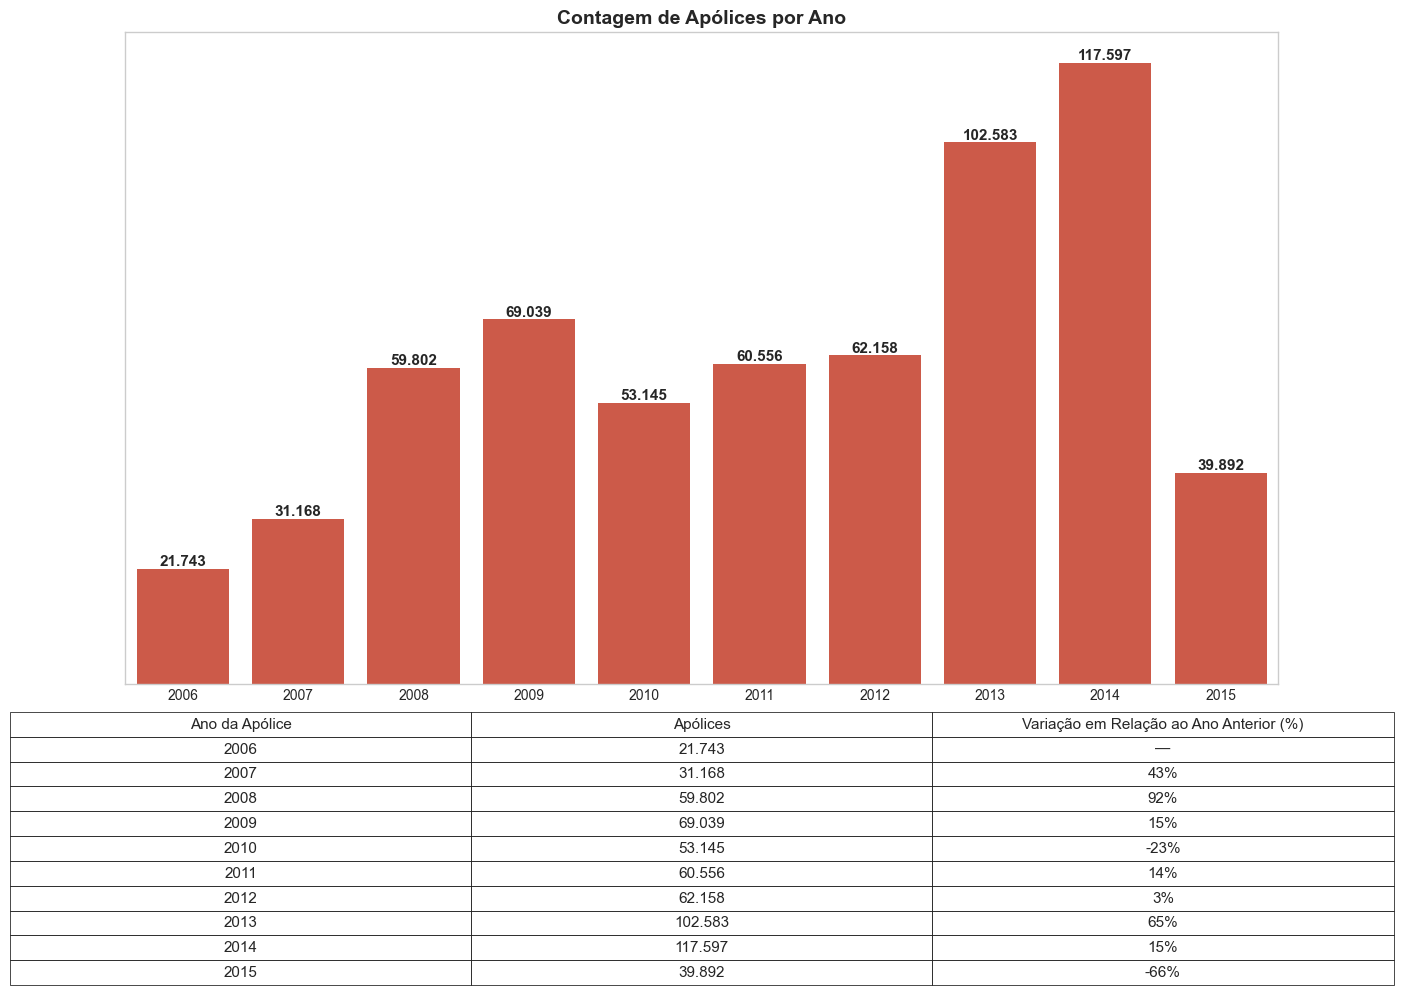

In [21]:
# Combinação Gráfico + Tabela Para Análise Completa

# Função para preparar a tabela com contagem e variação percentual
def preparar_tabela(df: pd.DataFrame) -> pd.DataFrame:
    """
    Agrupa o DataFrame por ano de apólice, calcula a contagem e a variação percentual.
    Retorna um DataFrame formatado com separador de milhar e variação percentual.
    """
    # Agrupar por ano e contar apólices
    df_ano = df.groupby('ANO_APOLICE').size().reset_index(name='Apólices')
    df_ano = df_ano.sort_values('ANO_APOLICE').rename(columns={'ANO_APOLICE': 'Ano da Apólice'})

    # Calcular variação percentual em relação ao ano anterior
    df_ano['Variação em Relação ao Ano Anterior (%)'] = df_ano['Apólices'].pct_change() * 100

    # Formatar colunas
    df_ano['Apólices'] = df_ano['Apólices'].apply(lambda x: f"{int(x):,}".replace(",", "."))
    df_ano['Variação em Relação ao Ano Anterior (%)'] = df_ano['Variação em Relação ao Ano Anterior (%)'].apply(
        lambda x: f"{x:.0f}%" if pd.notnull(x) else "—"
    )

    return df_ano


def plotar_grafico_e_tabela(df: pd.DataFrame) -> None:
    """
    Plota o gráfico de barras da contagem de apólices por ano
    e exibe a tabela de contagem e variação percentual abaixo do gráfico.
    """
    # Preparar tabela
    df_ano = preparar_tabela(df)

    # Criar figura com 2 subplots (gráfico em cima, tabela embaixo)
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})

    # --- Gráfico ---
    sns.countplot(data=df, x='ANO_APOLICE', order=sorted(df['ANO_APOLICE'].unique()), ax=axes[0])
    axes[0].set_title('Contagem de Apólices por Ano', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    axes[0].set_yticks([])

    # Rótulos nas barras com separador de milhar
    for n in axes[0].patches:
        valor = f"{int(n.get_height()):,}".replace(",", ".")
        axes[0].annotate(valor,
                         (n.get_x() + n.get_width() / 2, n.get_height()),
                         ha='center', va='bottom', fontsize=11, fontweight='bold')

    axes[0].grid(False)

    # --- Tabela ---
    axes[1].axis('off')
    table = axes[1].table(cellText=df_ano.values,
                          colLabels=df_ano.columns,
                          cellLoc='center',
                          loc='center')

    # Ajustes visuais da tabela
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()


# --- Execução ---
plotar_grafico_e_tabela(df)

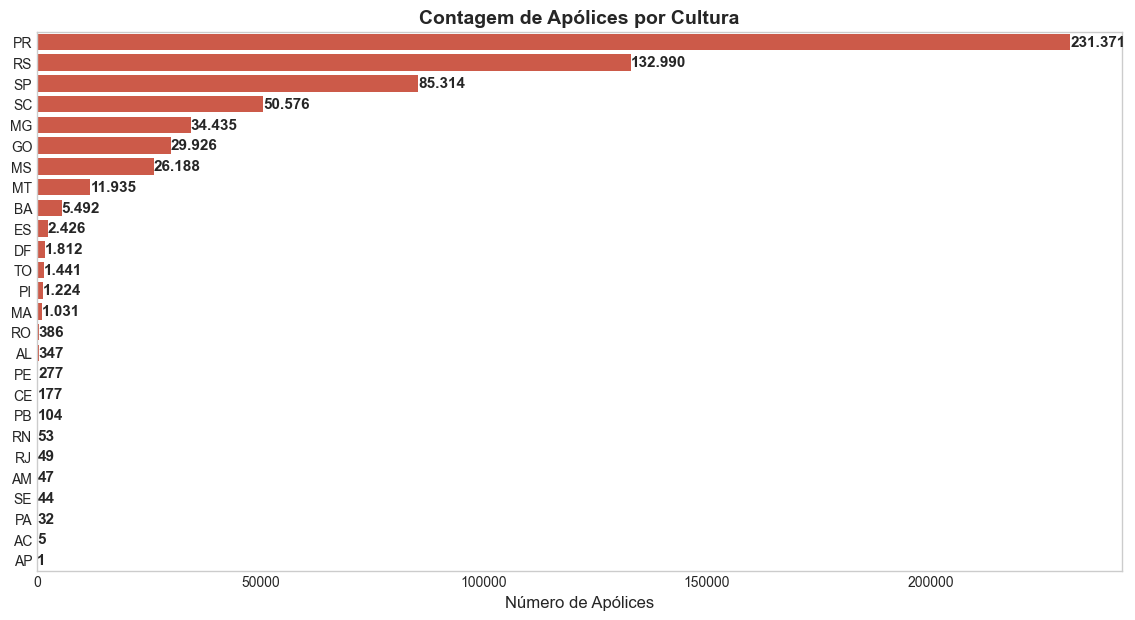

In [20]:
# Gráfico de barras horizontal da contagem de apólices por cultura
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='SG_UF_PROPRIEDADE', order=df['SG_UF_PROPRIEDADE'].value_counts().index)
plt.title('Contagem de Apólices por Cultura', fontsize=14, fontweight='bold')
plt.xlabel('Número de Apólices')
plt.ylabel('')

# Rótulos nas barras com separador de milhar
for n in plt.gca().patches:
    valor = f"{int(n.get_width()):,}".replace(",", ".")
    plt.gca().annotate(valor,
                       (n.get_width(), n.get_y() + n.get_height() / 2),
                       ha='left', va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x')
plt.show()
